Installing the 'category_encoders' library, which provides various encoding techniques




In [ ]:
!pip install category_encoders

Importing essential libraries for data analysis and visualization

In [ ]:
import pandas as pd  # for data manipulation and analysis
import numpy as np  # for numerical operations
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for enhanced visualization

# Load the Dataset
Load the data from a CSV file and store it in a DataFrame to analyze the structure.

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data for analysis/insurance.csv")

Provides a summary of the DataFrame, including shape, data types, and non-null values.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1335 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Displays the first 5 rows of the DataFrame

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Transposes and displays summary statistics of the DataFrame

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1335.0,30.661423,6.101038,15.9600,26.30250,30.400,34.687500,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


Calculates the number of missing values in each column of the DataFrame

In [ ]:
data.isnull().sum()

,0
age,0
sex,0
bmi,3
children,0
smoker,0
region,0
charges,0


Removes rows with missing values from the DataFrame

In [ ]:
data=data.dropna()

وضع الداتا الرقمية في داتا فريم جديدة

Numerical columns are selected from the DataFrame and stored in 'num'

In [ ]:
num=data.select_dtypes(["int64","float64"])
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


حساب الترابط بين الداتا الرقمية

Calculates the correlation matrix for the numerical columns in the DataFrame

In [ ]:
correlat_Matrex=num.corr()
correlat_Matrex

,age,bmi,children,charges
age,1.000000,0.108005,0.043262,0.299101
bmi,0.108005,1.000000,0.013074,0.198294
children,0.043262,0.013074,1.000000,0.067119
charges,0.299101,0.198294,0.067119,1.000000


Generates a heatmap visualization of the correlation matrix with annotations

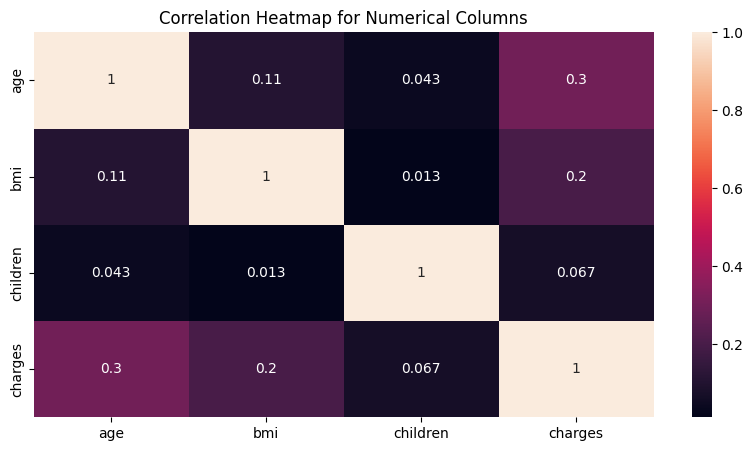

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(correlat_Matrex, annot=True)
plt.title("Correlation Heatmap for Numerical Columns")
plt.show()

the cardinality of each column in the DataFrame is calculated to provide insights into the data distribution.

In [ ]:
for i in data:
  x=data[i].value_counts()
  print(f"{i}: Has Unique values Count : {len(x)} " )


age: Has Unique values Count : 47 
sex: Has Unique values Count : 2 
bmi: Has Unique values Count : 548 
children: Has Unique values Count : 6 
smoker: Has Unique values Count : 2 
region: Has Unique values Count : 4 
charges: Has Unique values Count : 1334 


Print unique values ​​in each column.

In [ ]:
for i in data:
  x=data[i].unique()
  print(f"{i}: Has Unique values  : {x} " )


age: Has Unique values  : [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39] 
sex: Has Unique values  : ['female' 'male'] 
bmi: Has Unique values  : [27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.

create a new DataFrame cat_data containing only the categorical columns: "sex," "children," "smoker," and "region" from the original DataFrame

In [ ]:
cat_data=data[["sex","children","smoker","region"]]
cat_data

,sex,children,smoker,region
0,female,0,yes,southwest
1,male,1,no,southeast
2,male,3,no,southeast
3,male,0,no,northwest
4,male,0,no,northwest
...,...,...,...,...
1333,male,3,no,northwest
1334,female,0,no,northeast
1335,female,0,no,southeast
1336,female,0,no,southwest


create a visualization of the distribution of categorical variables in the DataFrame cat_data.

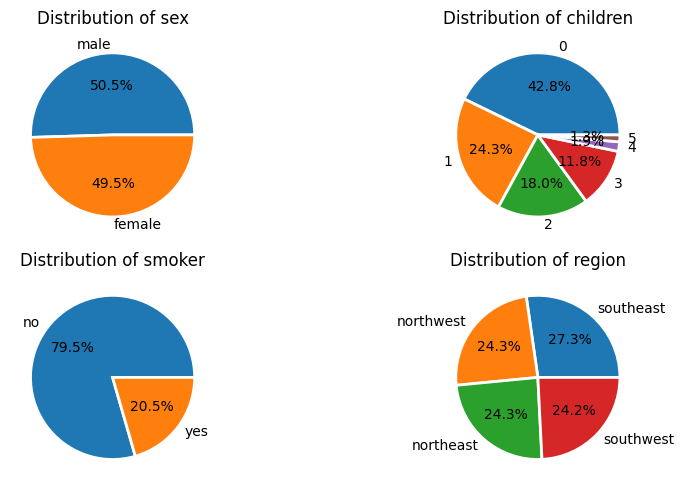

In [ ]:
# Set up the number of subplots based on the number of categorical columns
n_cols = len(cat_data.columns)
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(10, 5))  # Adjust rows and columns as needed

# Flatten axes for easy indexing if there are multiple rows
axes = axes.flatten()

for i, col in enumerate(cat_data.columns):
    x = cat_data[col].value_counts()
    axes[i].pie(x, labels=x.index, autopct='%1.1f%%' , wedgeprops={"linewidth":2 , "edgecolor": "white"})
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

create a cross-tabulation of the "sex" and "smoker" columns and then visualizes the results using a bar plot.

<Axes: xlabel='sex'>

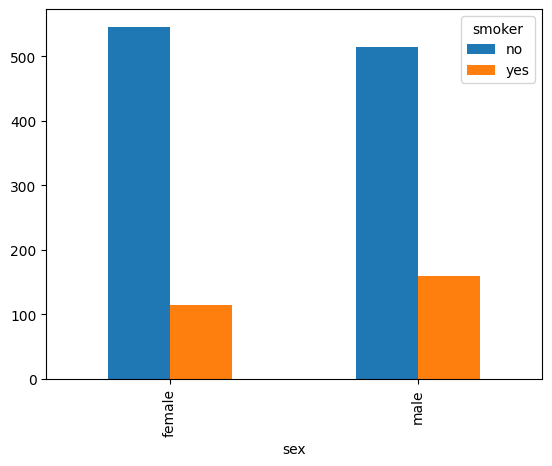

In [ ]:
Gender=pd.crosstab(data["sex"],data["smoker"])
Gender.plot(kind="bar")

create a cross-tabulation of the "children" and "smoker" columns and then visualizes the results using a bar plot.

<Axes: xlabel='children'>

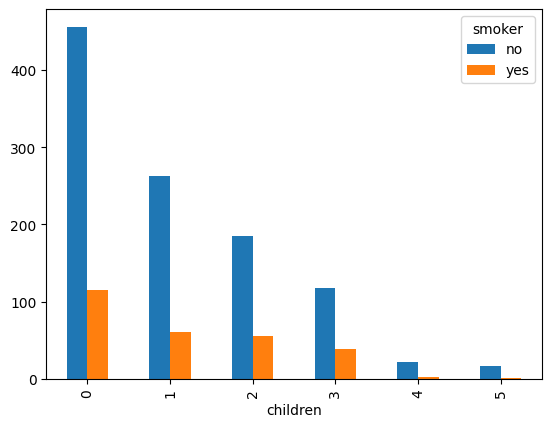

In [ ]:
Parents=pd.crosstab(data["children"],data["smoker"])
Parents.plot(kind="bar")

create a cross-tabulation of the "region" and "smoker" columns and then visualizes the results using a bar plot.

<Axes: xlabel='region'>

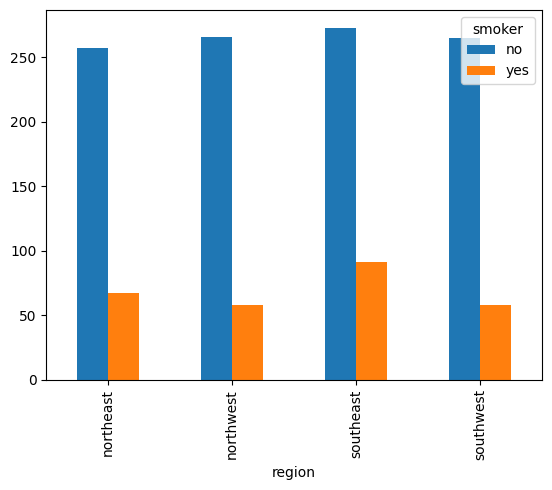

In [ ]:
Region=pd.crosstab(data["region"],data["smoker"])
Region.plot(kind="bar")

coutplot = barplot with crosstable

بحصل على نفس النتيجة

---





<Axes: xlabel='sex', ylabel='count'>

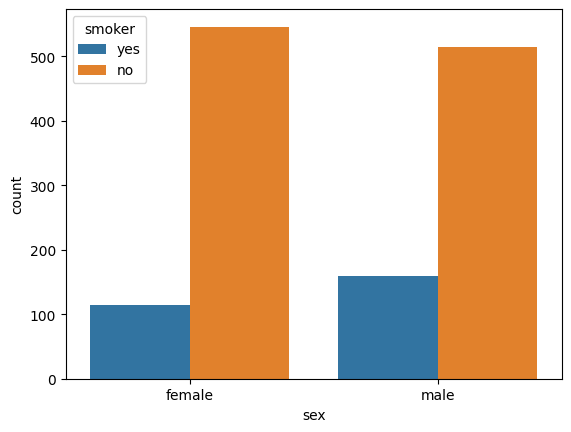

In [ ]:
sns.countplot(data=data, x="sex" , hue="smoker")

creates a count plot to visualize the distribution of smokers and non-smokers across different genders.

<Axes: xlabel='children', ylabel='count'>

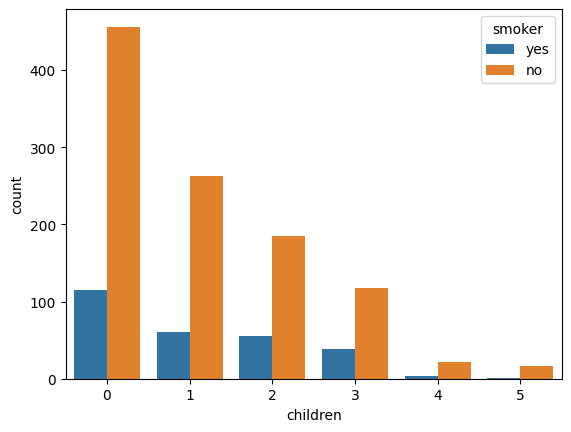

In [ ]:
sns.countplot(data=data, x="children", hue="smoker" )

<Axes: xlabel='region', ylabel='count'>

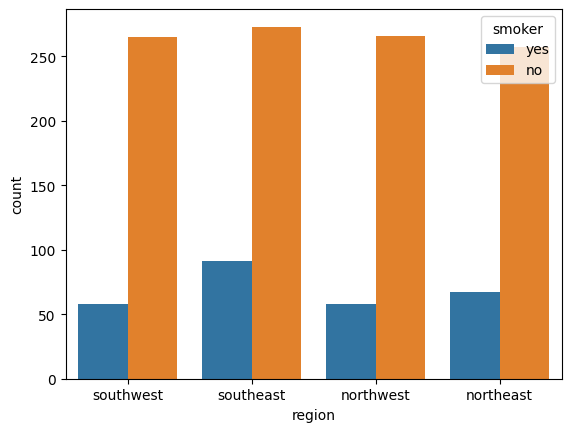

In [ ]:
sns.countplot(data=data, x="region" , hue="smoker")

create a separate histogram for each numerical column in the num DataFrame.

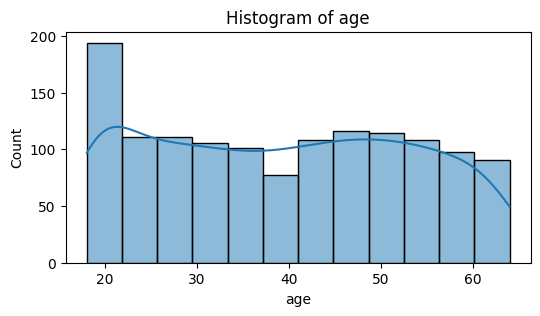

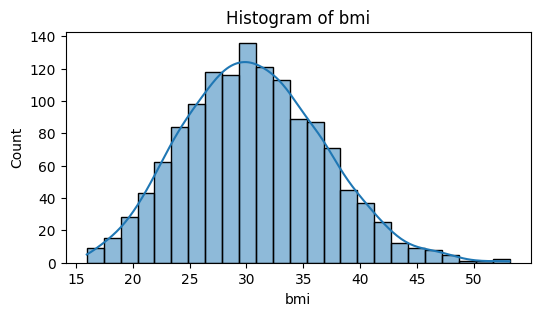

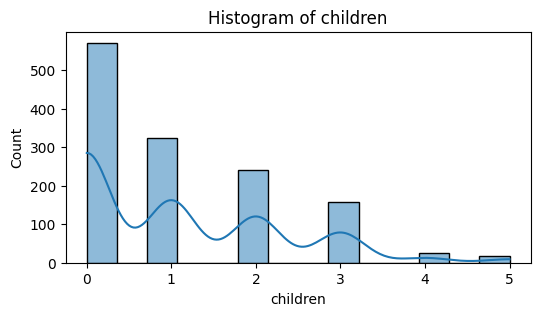

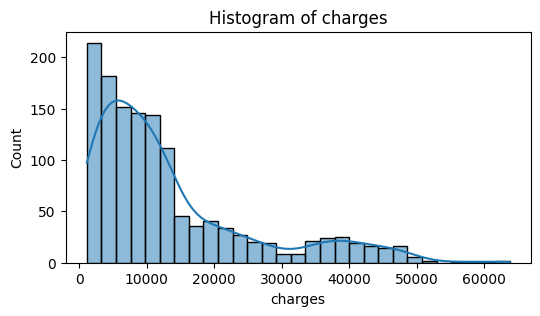

In [ ]:
for i in num:
 plt.figure(figsize=(6,3))
 sns.histplot(num, x=num[i],kde=True)
 plt.title(f"Histogram of {i}")
 plt.show()
 print(" ")

create two new DataFrames, smokers and non_smokers, by filtering the original DataFrame data based on the "smoker" column.

In [ ]:
smokers=data[(data["smoker"]=="yes")]
non_smoker=data[(data["smoker"]=="no")]

**رسم بياني لعلاقة جميع الاعمدة الرقمية مع الهدف **





**Matplotlib**

 create a series of histograms to compare the distributions of numerical variables between smokers and non-smokers.

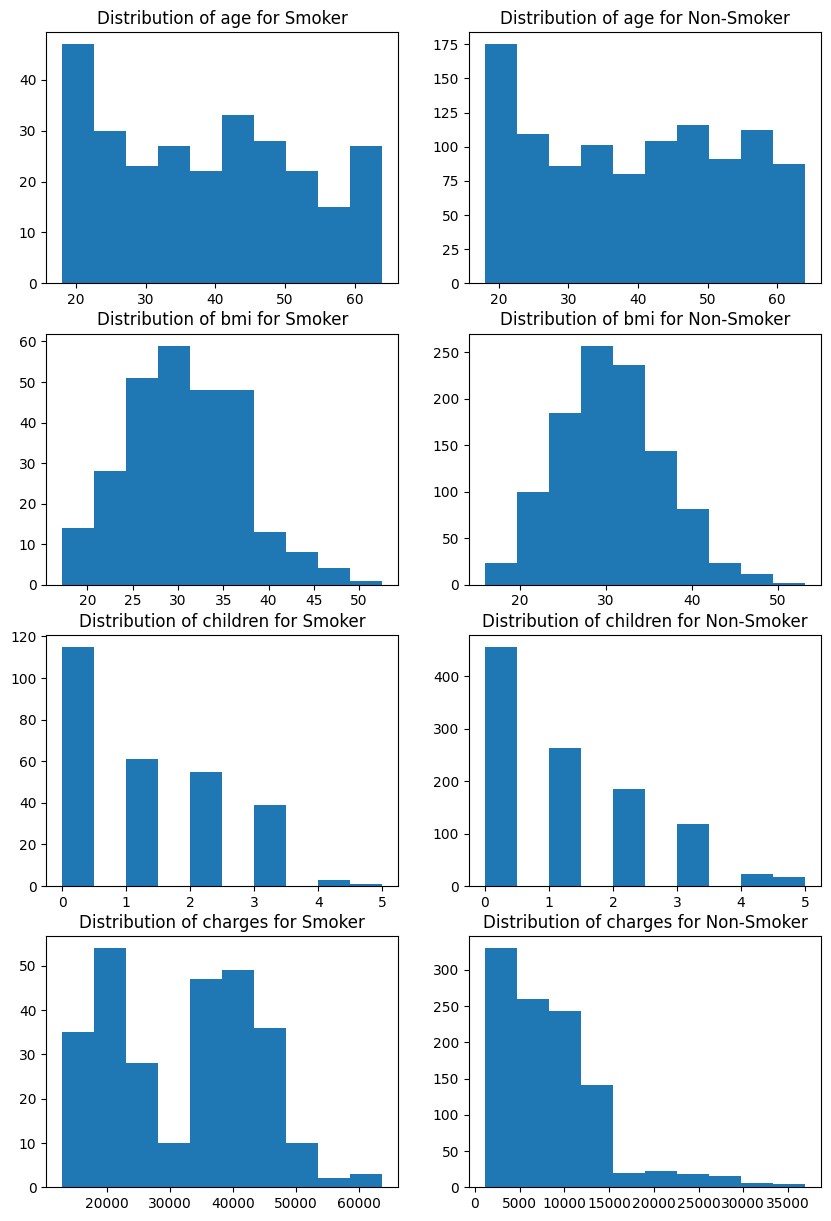

In [ ]:
suplot_number = 421
#for i in num.columns:
fig = plt.figure(figsize=(10,15))
for i in num.columns:
    ax = fig.add_subplot(suplot_number)
    suplot_number+=1
    ax.hist(smokers[i])
    ax.set_title(f'Distribution of {i} for Smoker')

    ax = fig.add_subplot(suplot_number)
    suplot_number+=1
    ax.hist(non_smoker[i])
    ax.set_title(f'Distribution of {i} for Non-Smoker')


**Seaborn**

generate a series of histograms to visually compare the distribution of numerical variables between two groups: smokers and non-smokers. For each numerical column in the dataset, two histograms are created side by side, allowing for a direct comparison of the data distributions.

In [ ]:
suplot_number = 421  # تعيين موقع أول رسم بياني
fig = plt.figure(figsize=(10, 15))  # إنشاء لوحة الرسم وتحديد حجمها

for i in num.columns:
    # رسم توزيع المدخنين
    ax = fig.add_subplot(suplot_number)
    suplot_number += 1
    sns.histplot(smokers[i], ax=ax)
    ax.set_title(f'Distribution of {i} for Smoker')

    # رسم توزيع غير المدخنين
    ax = fig.add_subplot(suplot_number)
    suplot_number += 1
    sns.histplot(non_smoker[i], ax=ax)
    ax.set_title(f'Distribution of {i} for Non-Smoker')

# تحسين توزيع المسافات بين الرسومات
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

**اضافات**

create a bar plot to visualize the number of children for smokers and non-smokers across different regions.




<Axes: xlabel='region', ylabel='children'>

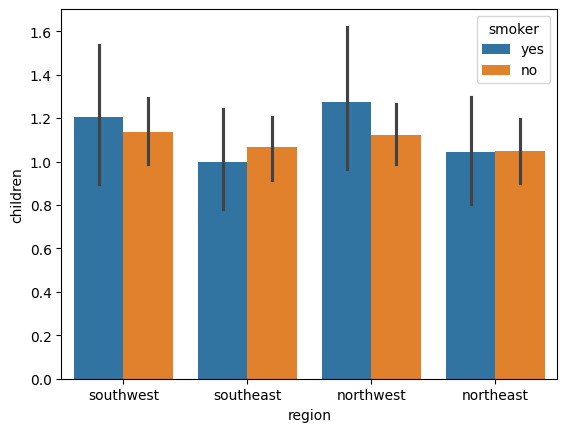

In [ ]:
sns.barplot(data=data, x="region", y="children", hue="smoker")

# **Encoding**

Label Encoder function

In [ ]:
from sklearn.preprocessing import LabelEncoder
def LEncoder(df,clm):
  lencoder=LabelEncoder()
  df[clm]=lencoder.fit_transform(df[clm])
  print(f"{clm} column values ​​were successfully encoded.")

One Hot Encoder function

In [ ]:
#import pandas as pd
def One_Hot_Encoder(df,clm):
  Data_Encoded=pd.get_dummies(df, columns=[clm])
  print(f"{clm} column values ​​were successfully encoded.")
  return Data_Encoded

Binary Encoder function

In [ ]:
import category_encoders as ce
def Binary_Encoder(df,clm):
  BEncoder=ce.BinaryEncoder(cols=[clm])
  Data_Encoded=BEncoder.fit_transform(df)
  print(f"{clm} column values ​​were successfully encoded.")
  return Data_Encoded

Ordinal Encoder function

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
def Ordinal_Encoder(df,clm,odr):
  Oencoder=OrdinalEncoder(categories=[odr])
  df[clm]=Oencoder.fit_transform(df[[clm]])
  print(f"{clm} column values ​​were successfully encoded.")

# **Scaling**

Min Max Scaling function

In [ ]:
from sklearn.preprocessing import MinMaxScaler
def Min_Max_Scaling(ColumnName):
  scaler=MinMaxScaler()
  scaledData=scaler.fit_transform(ColumnName.to_numpy().reshape(-1,1))
  return scaledData


Standard Scaling function

In [ ]:
from sklearn.preprocessing import StandardScaler
def Std_Scaling(ColumnName):
  scaler=StandardScaler()
  scaledData=scaler.fit_transform(ColumnName.to_numpy().reshape(-1,1))
  return scaledData

Robust Scaling function

In [ ]:
from sklearn.preprocessing import RobustScaler
def Robust_Scaling(ColumnName):
  scaler=RobustScaler()
  scaledData=scaler.fit_transform(ColumnName.to_numpy().reshape(-1,1))
  return scaledData

Decimal Scaling function

In [ ]:
def Decimal_Scaling(ColumnName):
  j=len(str(max(ColumnName)))
  scaledData=ColumnName/(10**j)
  return scaledData

creates a new, independent copy of the dataset stored in the variable num and assigns it to a new variable called num1.

In [ ]:
num1=num.copy()                                                                  #num: contains columns with numeric values ​​only.

apply Min-Max scaling to each column.

In [ ]:
for i in num1:                                                                    #Scaling was applied using MinMaxScaler
  num1[i]=Min_Max_Scaling(num1[i])
  print(f"{i} column values ​​were scaled successfully.")

age column values ​​were scaled successfully.
bmi column values ​​were scaled successfully.
children column values ​​were scaled successfully.
charges column values ​​were scaled successfully.


In [ ]:
num1

,age,bmi,children,charges
0,0.021739,0.321227,0.0,0.251611
1,0.000000,0.479150,0.2,0.009636
2,0.217391,0.458434,0.6,0.053115
3,0.326087,0.181464,0.0,0.333010
4,0.304348,0.347592,0.0,0.043816
...,...,...,...,...
1333,0.695652,0.403820,0.6,0.151299
1334,0.000000,0.429379,0.0,0.017305
1335,0.000000,0.562012,0.0,0.008108
1336,0.065217,0.264730,0.0,0.014144


In [ ]:
num2=num.copy()

In [ ]:
for i in num2:                                                                   #Scaling was applied using StandardScaler
  num2[i]=Std_Scaling(num2[i])
  print(f"{i} column values ​​were scaled successfully.")

age column values ​​were scaled successfully.
bmi column values ​​were scaled successfully.
children column values ​​were scaled successfully.
charges column values ​​were scaled successfully.


In [ ]:
num2

,age,bmi,children,charges
0,-1.438258,-0.452785,-0.910479,0.297300
1,-1.509472,0.509707,-0.080793,-0.954047
2,-0.797331,0.383452,1.578578,-0.729199
3,-0.441261,-1.304598,-0.910479,0.718247
4,-0.512475,-0.292096,-0.910479,-0.777291
...,...,...,...,...
1333,0.769379,0.050597,1.578578,-0.221451
1334,-1.509472,0.206366,-0.910479,-0.914390
1335,-1.509472,1.014728,-0.910479,-0.961948
1336,-1.295830,-0.797118,-0.910479,-0.930737


In [ ]:
num3=num.copy()

In [ ]:
for i in num3:                                                                   #Scaling was applied using RobustScaler
  num3[i]=Robust_Scaling(num3[i])
  print(f"{i} column values ​​were scaled successfully.")

age column values ​​were scaled successfully.
bmi column values ​​were scaled successfully.
children column values ​​were scaled successfully.
charges column values ​​were scaled successfully.


In [ ]:
num3

,age,bmi,children,charges
0,-0.833333,-0.298151,-0.5,0.626217
1,-0.875000,0.401908,0.0,-0.639733
2,-0.458333,0.310078,1.0,-0.412261
3,-0.250000,-0.917710,-0.5,1.052077
4,-0.291667,-0.181276,-0.5,-0.460914
...,...,...,...,...
1333,0.458333,0.067979,1.0,0.101413
1334,-0.875000,0.181276,-0.5,-0.599612
1335,-0.875000,0.769231,-0.5,-0.647726
1336,-0.750000,-0.548599,-0.5,-0.616150


In [ ]:
num4=num.copy()

In [ ]:
for i in num4:                                                                   #Scaling was applied using Decimal Scaling
  num4[i]=Decimal_Scaling(num4[i])
  print(f"{i} column values ​​were scaled successfully.")

age column values ​​were scaled successfully.
bmi column values ​​were scaled successfully.
children column values ​​were scaled successfully.
charges column values ​​were scaled successfully.


In [ ]:
num4

,age,bmi,children,charges
0,0.19,0.000279,0.0,1.688492e-07
1,0.18,0.000338,0.1,1.725552e-08
2,0.28,0.000330,0.3,4.449462e-08
3,0.33,0.000227,0.0,2.198447e-07
4,0.32,0.000289,0.0,3.866855e-08
...,...,...,...,...
1333,0.50,0.000310,0.3,1.060055e-07
1334,0.18,0.000319,0.0,2.205981e-08
1335,0.18,0.000369,0.0,1.629833e-08
1336,0.21,0.000258,0.0,2.007945e-08


# **`Task`**

retrieve the number of columns in the DataFrame 'num'.

In [ ]:
num.columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

create a new DataFrame 'New_num' by selecting the 'age', 'bmi', and 'charges' columns from the original DataFrame 'num'.

In [ ]:
New_num=num[['age', 'bmi', 'charges']]                                            #without children   # تم نسخ الداتا الرقمية الى داتا جديدة
New_cat_data=cat_data.copy()                                                      #تم نسخ الداتا الفئوية الى داتا جديدة

This line applies binary encoding to the 'sex' column of the 'New_cat_data' DataFrame using the Binary_Encoder function.

In [ ]:
New_cat_data=Binary_Encoder(New_cat_data,"sex")

sex column values ​​were successfully encoded.


This line applies label encoding to the 'smoker' column of the 'New_cat_data' DataFrame using the LEncoder function.

In [ ]:
LEncoder(New_cat_data,"smoker")

smoker column values ​​were successfully encoded.


This line applies ordinal encoding to the 'region' column of the 'New_cat_data' DataFrame using the Ordinal_Encoder function.

In [ ]:
order=['southwest','southeast','northwest','northeast']
Ordinal_Encoder(New_cat_data,"region",order)

region column values ​​were successfully encoded.


This loop iterates over each column in the 'New_num' DataFrame to apply Min-Max scaling.

In [ ]:
for i in New_num:                                                                    #Scaling was applied using MinMaxScaler
  New_num[i]=Min_Max_Scaling(New_num[i])
  print(f"{i} column values ​​were scaled successfully.")

age column values ​​were scaled successfully.
bmi column values ​​were scaled successfully.
charges column values ​​were scaled successfully.


<ipython-input-53-da8e83d353a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_num[i]=Min_Max_Scaling(New_num[i])
<ipython-input-53-da8e83d353a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_num[i]=Min_Max_Scaling(New_num[i])
<ipython-input-53-da8e83d353a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

This loop iterates over each column in the 'New_cat_data' DataFrame to apply Min-Max scaling.

In [ ]:
for i in New_cat_data:                                                                    #Scaling was applied using MinMaxScaler
  New_cat_data[i]=Min_Max_Scaling(New_cat_data[i])
  print(f"{i} column values ​​were scaled successfully.")

sex_0 column values ​​were scaled successfully.
sex_1 column values ​​were scaled successfully.
children column values ​​were scaled successfully.
smoker column values ​​were scaled successfully.
region column values ​​were scaled successfully.


This line concatenates the 'New_cat_data' and 'New_num' DataFrames along the columns (axis=1).


In [ ]:
New_Data=pd.concat([New_cat_data,New_num],axis=1)

In [ ]:
New_Data

,sex_0,sex_1,children,smoker,region,age,bmi,charges
0,0.0,1.0,0.0,1.0,0.000000,0.021739,0.321227,0.251611
1,1.0,0.0,0.2,0.0,0.333333,0.000000,0.479150,0.009636
2,1.0,0.0,0.6,0.0,0.333333,0.217391,0.458434,0.053115
3,1.0,0.0,0.0,0.0,0.666667,0.326087,0.181464,0.333010
4,1.0,0.0,0.0,0.0,0.666667,0.304348,0.347592,0.043816
...,...,...,...,...,...,...,...,...
1333,1.0,0.0,0.6,0.0,0.666667,0.695652,0.403820,0.151299
1334,0.0,1.0,0.0,0.0,1.000000,0.000000,0.429379,0.017305
1335,0.0,1.0,0.0,0.0,0.333333,0.000000,0.562012,0.008108
1336,0.0,1.0,0.0,0.0,0.000000,0.065217,0.264730,0.014144


**Task**

We need to convert the sex column from male/female to 0/1.

We need to convert the smoker column from no/yes to 0/1.

we need to convert region column to 0,1,2,3

Then Apply Scalling on the while dataframe.

